### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 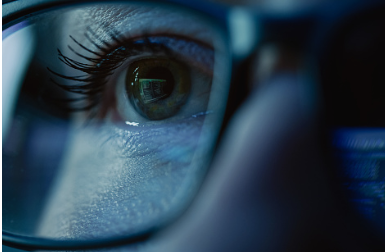 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

# Defining Training Directories and displaying

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Found 86 images belonging to 2 classes.


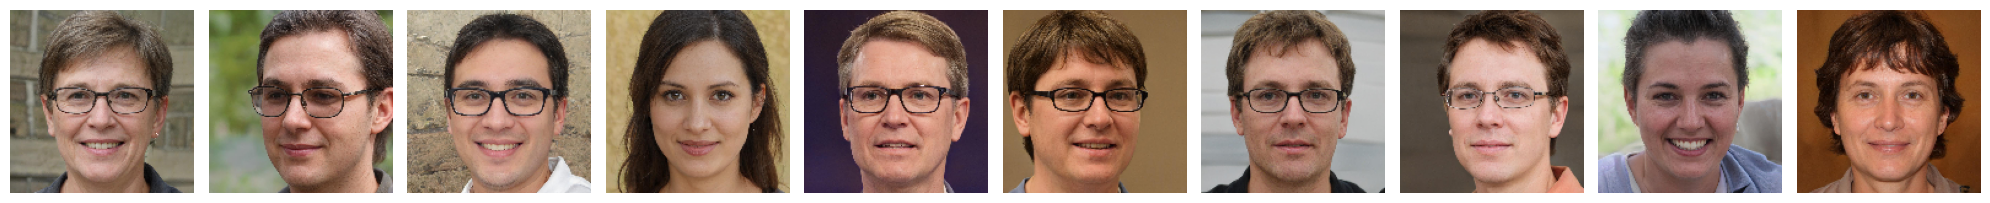

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining training directories
train_dir = r'C:\Users\vinayakb\Downloads\glasses_3_3_1\glasses\Train'

# Create ImageDataGenerator instances
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

# Function to display images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Displaying sample images from the dataset
sample_train_images, _ = next(train_generator)
plot_images(sample_train_images[:10])

# Building the CNN Model:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This step involves creating a sequential model and adding layers to it. The model includes convolutional layers, max-pooling layers, a flattening layer, dense layers, and a dropout layer. Each layer is specified with its parameters such as the number of filters, kernel size, activation function, and input shape for the first layer.

- **Convolutional Layers:** Increase in number (e.g., 32, 64, 128) captures more complex features but adds to model complexity.
- **Filter Size:** Larger filter sizes (e.g., (3, 3)) capture broader features, impacting feature extraction and computational cost.
- **Activation Function:** 'Relu' (Rectified Linear Unit) introduces non-linearity, aiding in model learning and feature representation.
- **Pooling Layers:** MaxPooling2D reduces spatial dimensions, aiding in feature extraction and computational efficiency.
- **Adjustments Impact:** Changes in these parameters alter CNN architecture, affecting feature learning and overall model performance.

# Image Augmentation and Data Preparation:

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_dir = r'C:\Users\vinayakb\Downloads\glasses_3_3_1\glasses\Validation'

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 86 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


1. **Data Augmentation for Training Data:** Initialize an `ImageDataGenerator` with various augmentation techniques to generate diverse training samples.
2. **Data Preparation for Validation Data:** Initialize an `ImageDataGenerator` with rescaling to maintain a consistent evaluation metric for validation data.
3. **Create Training Data Generator:** Use `flow_from_directory` to load and augment training images, generating data batches for model training.
4. **Define Validation Directory:** Specify the path to the validation dataset directory.
5. **Create Validation Data Generator:** Use `flow_from_directory` to load validation images, generating data batches for model validation.

# Training the Model:

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/100 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step - accuracy: 0.5462 - loss: 1.9752

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5796 - loss: 1.7537 - val_accuracy: 0.3023 - val_loss: 0.7150
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5168 - loss: 0.6868 - val_accuracy: 0.6977 - val_loss: 0.6379
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6978 - loss: 0.6173 - val_accuracy: 0.6977 - val_loss: 0.6055
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7001 - loss: 0.6496 - val_accuracy: 0.6977 - val_loss: 0.6022
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6962 - loss: 0.6430 - val_accuracy: 0.6977 - val_loss: 0.6333
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6994 - loss: 0.6436 - val_accuracy: 0.6977 - val_loss: 0.6026
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6952 - loss: 0.6142 - val_accuracy: 0.6977 - val_loss: 0.6085
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6989 - loss: 0.6116 - val_accuracy: 0.697

 This step trains the model using the fit method. It involves specifying the training data generator, number of steps per epoch, number of epochs, validation data generator, and validation steps. The fit method returns a history object containing details about the training process.

# Plotting Training and Validation Metrics:

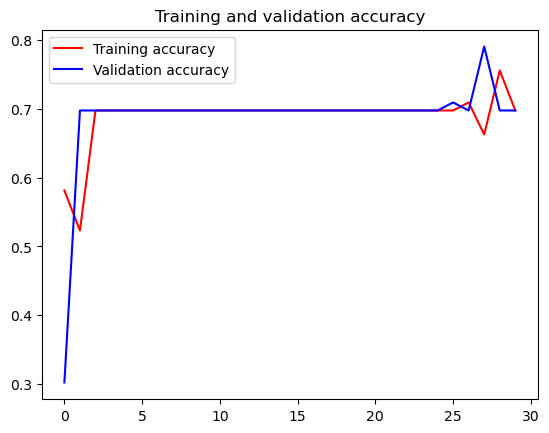

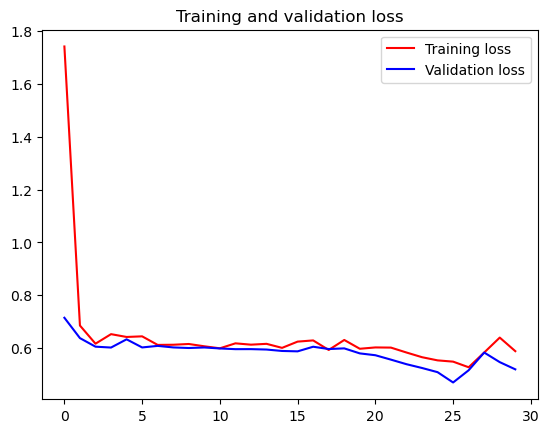

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [6]:
# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the values
for epoch in range(len(acc)):
    print(f"Epoch {epoch + 1}/{len(acc)}")
    print(f" - Training Accuracy: {acc[epoch] * 100:.2f}%")
    print(f" - Validation Accuracy: {val_acc[epoch] * 100:.2f}%")
    print(f" - Training Loss: {loss[epoch]:.4f}")
    print(f" - Validation Loss: {val_loss[epoch]:.4f}")
    print("\n")


Epoch 1/30
 - Training Accuracy: 58.14%
 - Validation Accuracy: 30.23%
 - Training Loss: 1.7421
 - Validation Loss: 0.7150


Epoch 2/30
 - Training Accuracy: 52.33%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6855
 - Validation Loss: 0.6379


Epoch 3/30
 - Training Accuracy: 69.77%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6168
 - Validation Loss: 0.6055


Epoch 4/30
 - Training Accuracy: 69.77%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6529
 - Validation Loss: 0.6022


Epoch 5/30
 - Training Accuracy: 69.77%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6422
 - Validation Loss: 0.6333


Epoch 6/30
 - Training Accuracy: 69.77%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6446
 - Validation Loss: 0.6026


Epoch 7/30
 - Training Accuracy: 69.77%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6121
 - Validation Loss: 0.6085


Epoch 8/30
 - Training Accuracy: 69.77%
 - Validation Accuracy: 69.77%
 - Training Loss: 0.6128
 - Validation Loss: 0.6026




Extract Training History: Retrieve accuracy, validation accuracy, loss, and validation loss from the training history.

Plot Training and Validation Accuracy: Visualize the training and validation accuracy over the epochs.

Plot Training and Validation Loss: Visualize the training and validation loss over the epochs.

# Conclusion :

### Conclusion Summary

1. **Initial Underfitting:** The model shows initial underfitting with low training and validation accuracies.
2. **Stagnation:** For most epochs, training and validation accuracies remain constant at 69.77%, indicating learning stagnation.
3. **Minor Improvements:** Occasional improvements in accuracy are seen but are not consistent.
4. **Model Adjustment Needed:** The model likely needs tuning of hyperparameters, such as learning rate adjustments or increased complexity.
5. **Regularization and Data Augmentation:** Implementing dropout, L2 regularization, and data augmentation could enhance model performance and generalization.

                             THANK YOU